# Sprace Matrix

In [32]:
from matplotlib.pyplot import imread as imread
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np

## Beyaz Siyah'a Çeviren Fonksiyon

In [151]:
def convert_RGB_to_BW(img, threshold = 100):
    res = np.zeros((img.shape[0], img.shape[1]))
    for i in range(res.shape[0]):
        for j in range(res.shape[1]):
            # 3 bileşenlerin ortalaması belirlenen threshold üstünde ise 1 olarak kabul edeceğiz
            if(sum(img[i,j,:])/3 > threshold):
                res[i,j] = 1
            # değil ise 0 olarak kabul edeceğiz
            else:
                res[i,j] = 0
    return res

## Histogram Hesaplayan Fonksiyon

In [83]:
def get_histogram(img):
    res = {}
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            item = img[i,j]
            if(item in res):
                res[item] += 1
            else:
                res[item] = 1
    return res

# Sprace Matrisler

Saklanılacak image'ı çok sayıda 0'ler kapsadığı için tüm değerleri saklamak bellek israfı olur, bundan dolayı ``Sprace Matrix``'ı kullanarak 'önemli değerler' tutuyoruz.

2 şey oluşturacağız :

* **D seti**: foto'da pixillerin değeri 1 olan pixellerin kordanitorları, içinde 2 tuple elemanlar bulunuyor, örnek: (1,2), (3,55).
 Set Olduğu için aynı eleman birden fazla bulunamaz

* **f sözlüğü**: D setinde her bir eleman için değer vermek için kullanılacak, bizim durumda fotoyu sadece 0 ve 1'lerden oluştuğu için tüm elemanlar içinde 1 olacak (0 olamaz çünkü 0 olduğu zamanda D setine almıyoruz bile)

Yükarıdaki 2 elemanları kapsayan tek bir nesne tipi  ``MyMatrix``bir class oluşturuoruz, bu sınıfı oluşturacağımız D ve f değerleri bir nesne içinde kapsamak için oluşturuyoruz.


## MyMatrix sınıfı

In [1]:
class MyMatrix():
    def __init__(self, _d, _f):
        self.D = _d
        self.f = _f

#### Verilen bir BW image için Sprace Matrix (MyMatrix tipinden)  oluşturan bir fonksiyon :

In [156]:
def Create_D_F_uzun(img):
    d = set()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] == 0:
                d.add((i,j))
    f = {}
    for i,j in d:
        f[(i,j)] = 1
    return MyMatrix(d,f)

**Note:** Yükarıdaki fonksiyon 100% tam aynı işlem yapan fonksiyon list comperhension syntaxı kullanarak aşağıda gibi yazabiliriz :

In [ ]:
def Create_D_F(img):
    d = {(i,j)   for i in range(img.shape[0])
                 for j in range(img.shape[1])
                 if img[i,j] == 0
        }
    f = {(i,j):1 for i,j in d}
    return MyMatrix(d,f)

### MyMatrix Test :

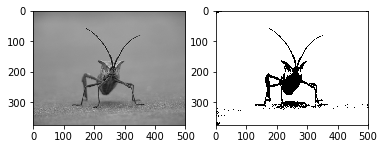

In [160]:
# bir foto yükleme
img = imread('Bug.png')

# Beyaz Siyaha Çevirmek
img_bw = convert_RGB_to_BW(img, 0.45)

# Sprace Matrisi oluşturmak
spraceMat = Create_D_F(img_bw)

plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(img_bw, cmap='gray')
plt.show()

In [172]:
print('spraceMat.D ilk 5 eleman :')
D_ilk_5_eleman = list(spraceMat.D)[0:5]
for i in D_ilk_5_eleman:
    print('\t', i)

spraceMat.D ilk 5 eleman :
	 (308, 246)
	 (290, 329)
	 (312, 241)
	 (241, 317)
	 (190, 246)


In [173]:
print('spraceMat.f ilk 5 eleman :')
for i in D_ilk_5_eleman:
    print('\tspraceMat.f[' + str(i) + ']\t= ' + str(spraceMat.f[i]))    

spraceMat.f ilk 5 eleman :
	spraceMat.f[(308, 246)]	= 1
	spraceMat.f[(290, 329)]	= 1
	spraceMat.f[(312, 241)]	= 1
	spraceMat.f[(241, 317)]	= 1
	spraceMat.f[(190, 246)]	= 1


In [163]:
shape = img_bw.shape
print('BW image shape : \t\t' + str(shape))
print('BW image eleman sayisi :\t' + str(shape[0] * shape[1]))
print('spraceMat.D elemanlar sayisi :\t' + str(len(spraceMat.D)))

BW image shape : 		(375, 500)
BW image eleman sayisi :	187500
spraceMat.D elemanlar sayisi :	11823


Yükarıda görüldüğü gibi asıl BW fotoğrafta ~187 bin eleman varken sprace matrisinde sadece ~11 bin eleman var.